In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import torch
from torchvision import transforms, datasets



=== Category: glioma ===
Total images: 1321
Sample dimensions (height, width, channels):
[[512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]]
Sample mean pixel intensities (BGR):
[[30.18614578 30.18614578 30.18614578]
 [25.32735825 25.32735825 25.32735825]
 [42.40819168 42.40819168 42.40819168]
 [17.84985733 17.84985733 17.84985733]
 [34.50954819 34.50954819 34.50954819]]


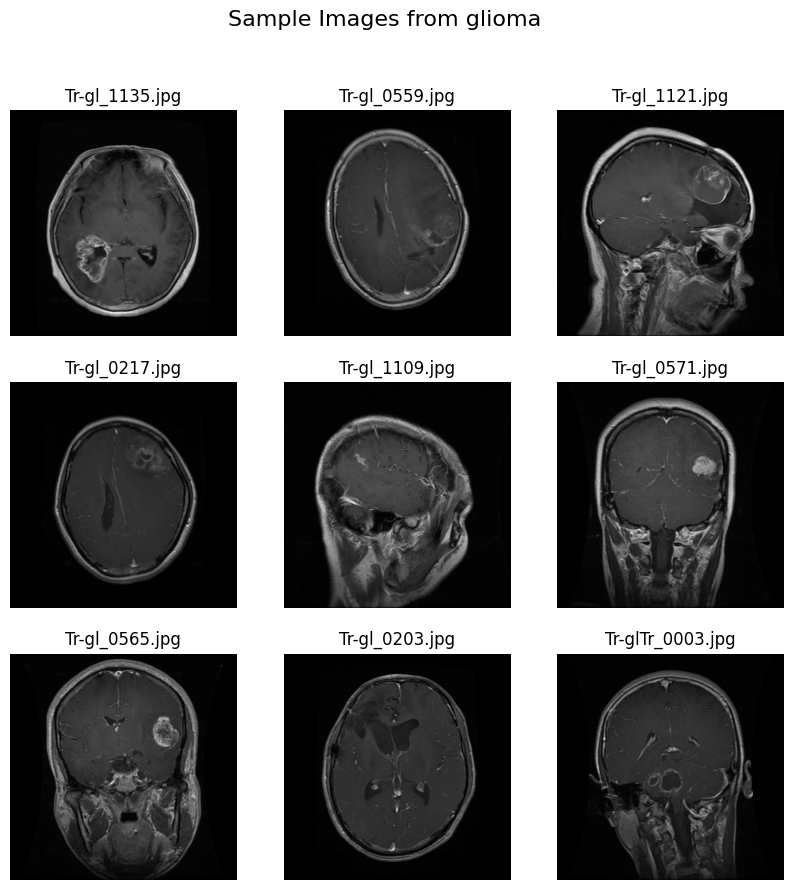

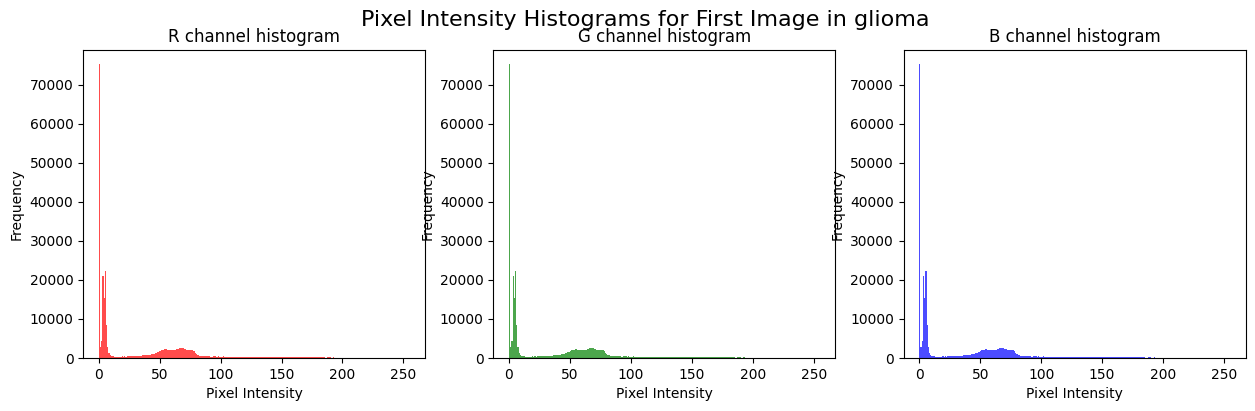



=== Category: meningioma ===
Total images: 1339
Sample dimensions (height, width, channels):
[[512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]]
Sample mean pixel intensities (BGR):
[[29.7555275  29.7555275  29.7555275 ]
 [57.73360825 57.73360825 57.73360825]
 [35.29805374 35.29805374 35.29805374]
 [38.46725082 38.46725082 38.46725082]
 [31.88244629 31.88244629 31.88244629]]


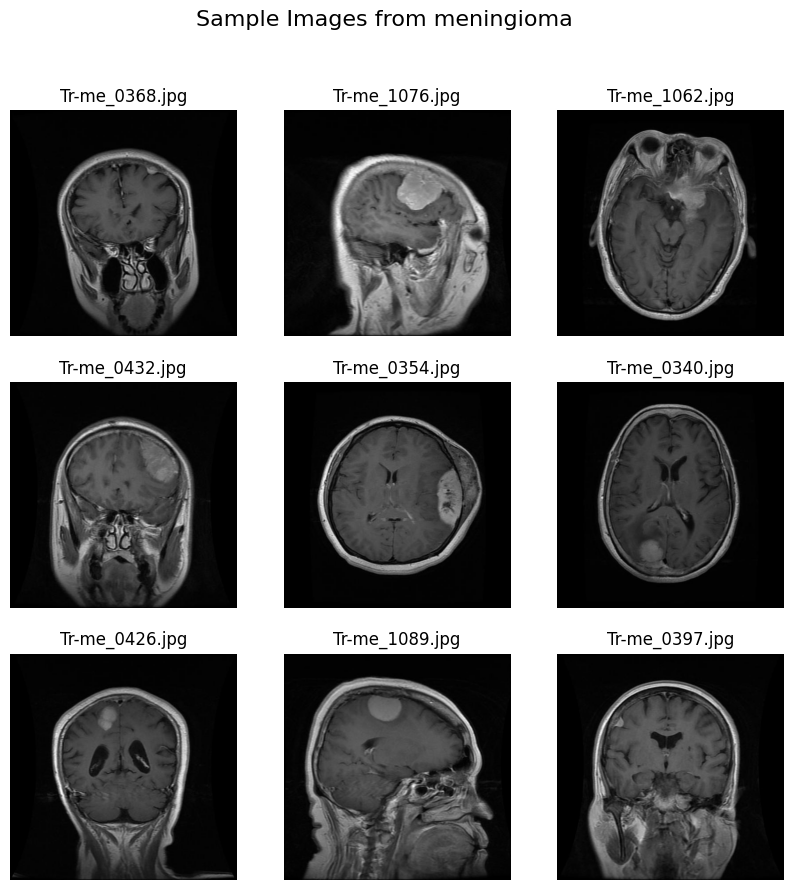

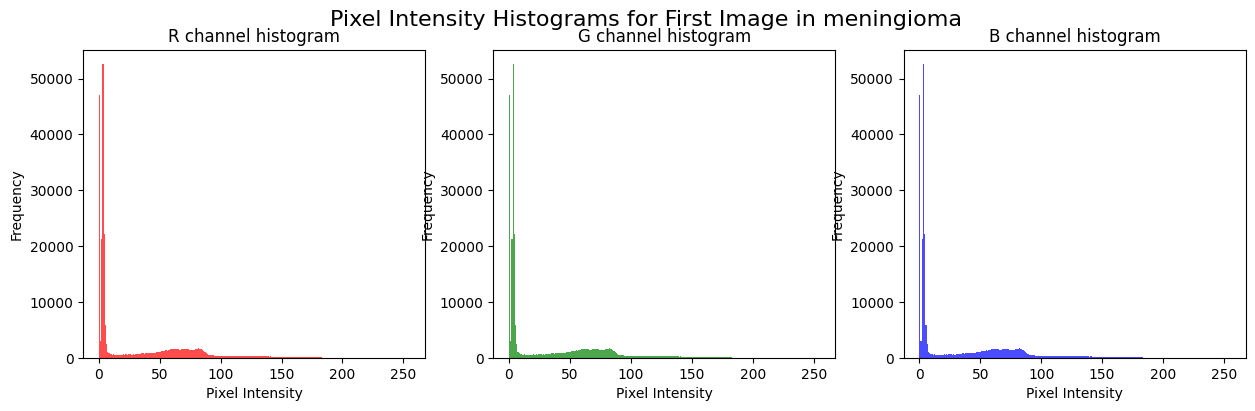



=== Category: notumor ===
Total images: 1595
Sample dimensions (height, width, channels):
[[244 206   3]
 [222 227   3]
 [248 208   3]
 [340 339   3]
 [225 225   3]]
Sample mean pixel intensities (BGR):
[[95.66067165 95.67396148 95.9724057 ]
 [62.73111878 62.73111878 62.73111878]
 [96.31556297 96.31556297 96.31556297]
 [56.95136214 56.95136214 56.95136214]
 [48.29477531 48.29477531 48.29477531]]


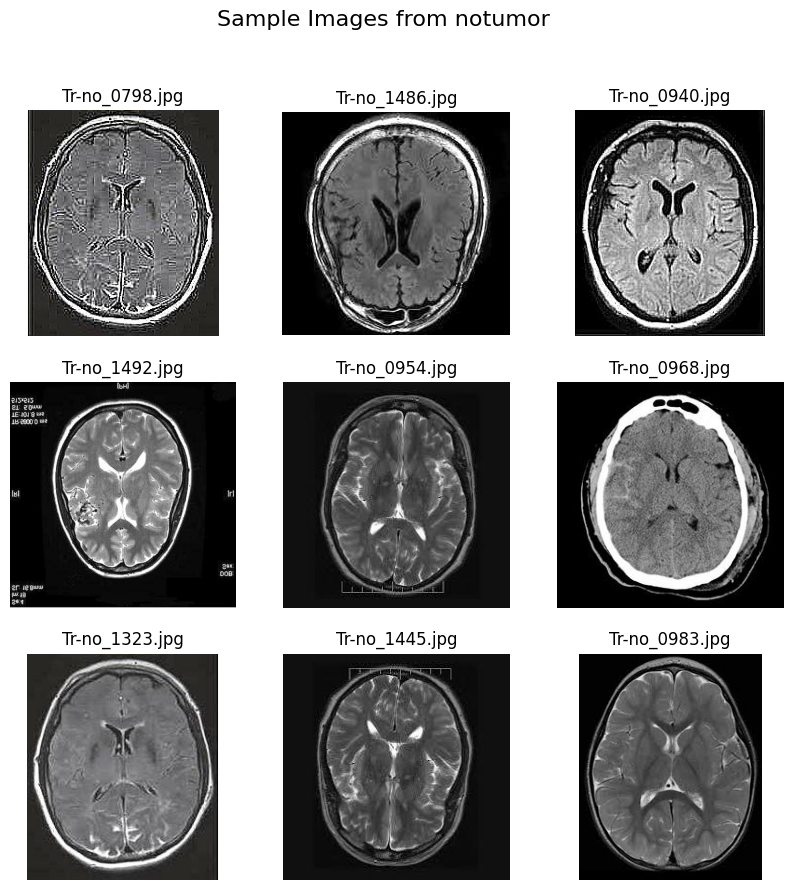

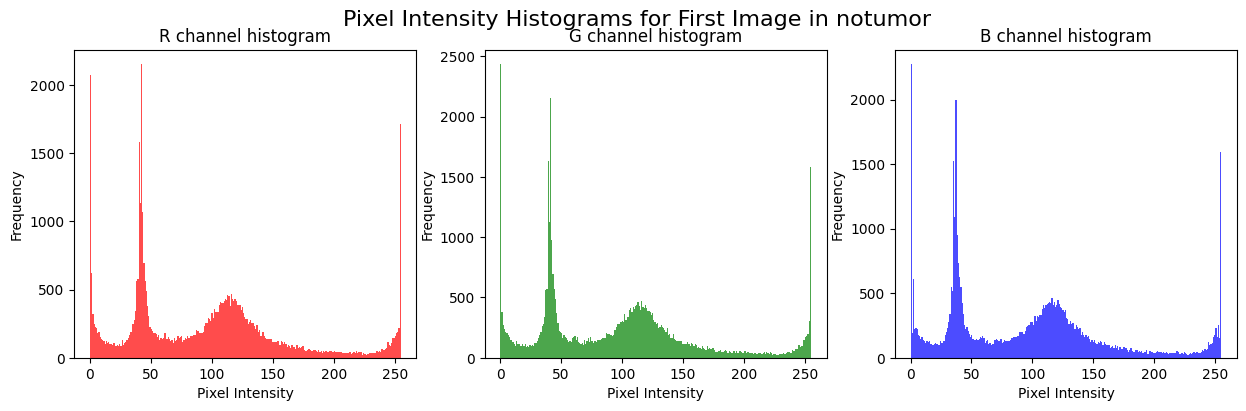



=== Category: pituitary ===
Total images: 1457
Sample dimensions (height, width, channels):
[[512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]
 [512 512   3]]
Sample mean pixel intensities (BGR):
[[36.70991516 36.70991516 36.70991516]
 [50.33509445 50.33509445 50.33509445]
 [49.05597305 49.05597305 49.05597305]
 [43.49607849 43.49607849 43.49607849]
 [52.32444382 52.32444382 52.32444382]]


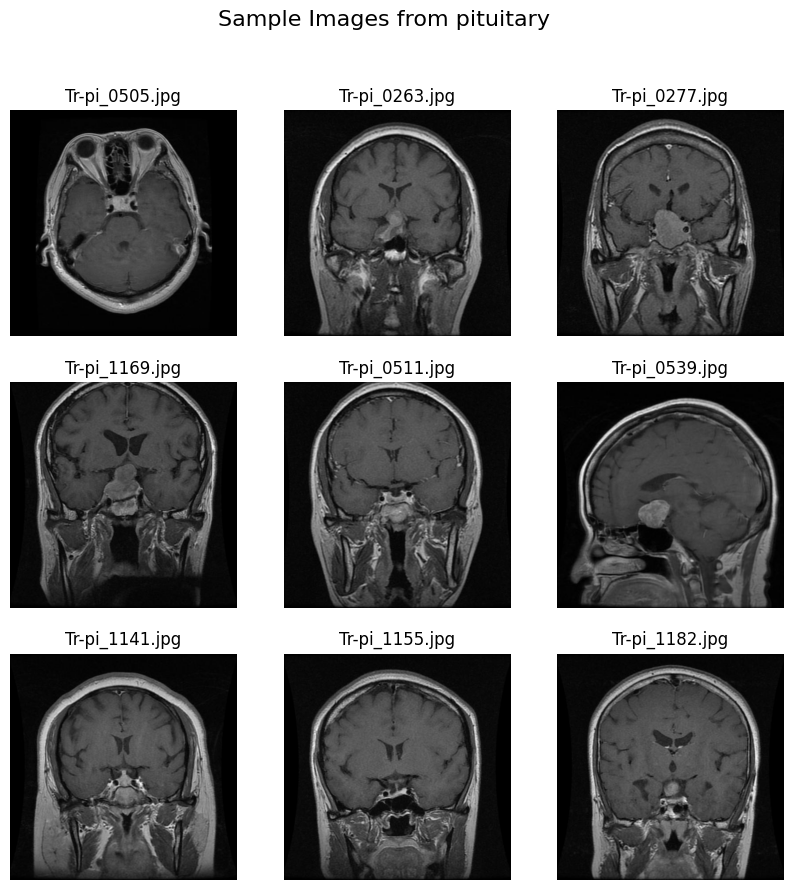

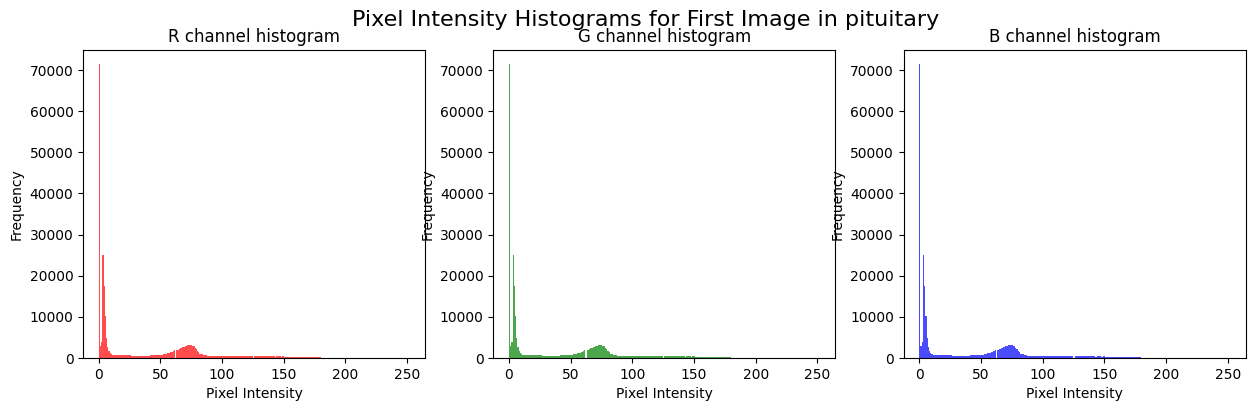

In [2]:
# Define the path to the training dataset and the category folders
train_path = 'dataset/training'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Loop over each category in the training dataset
for category in categories:
    print(f"\n\n=== Category: {category} ===")
    category_path = os.path.join(train_path, category)
    
    # Get all .jpg and .png images in the category folder
    image_paths = glob(os.path.join(category_path, '*.[jp][pn]g'))
    print(f"Total images: {len(image_paths)}")
    
    dims = []  # To store image dimensions (height, width, channels)
    means = []  # To store mean pixel intensities for each image (BGR format)
    
    # Iterate over each image to collect statistics
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip corrupted images
        dims.append(img.shape)
        # Compute mean intensity for each channel
        means.append(np.mean(img, axis=(0, 1)))
    
    dims = np.array(dims)
    means = np.array(means)
    
    # Print sample image dimensions and mean intensities
    if dims.size > 0:
        print("Sample dimensions (height, width, channels):")
        print(dims[:5])
    if means.size > 0:
        print("Sample mean pixel intensities (BGR):")
        print(means[:5])
    
    # Display a grid of up to 9 sample images from this category
    num_samples = min(9, len(image_paths))
    if num_samples > 0:
        plt.figure(figsize=(10, 10))
        for i in range(num_samples):
            img = cv2.imread(image_paths[i])
            if img is None:
                continue
            # Convert from BGR (OpenCV default) to RGB for correct color display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, i+1)
            plt.imshow(img_rgb)
            plt.title(os.path.basename(image_paths[i]))
            plt.axis('off')
        plt.suptitle(f"Sample Images from {category}", fontsize=16)
        plt.show()
    
    # Plot pixel intensity histograms for the first image (if available)
    if len(image_paths) > 0:
        sample_img = cv2.imread(image_paths[0])
        if sample_img is not None:
            sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
            colors = ['r', 'g', 'b']
            plt.figure(figsize=(15, 4))
            for i, col in enumerate(colors):
                plt.subplot(1, 3, i+1)
                plt.hist(sample_img[:, :, i].ravel(), bins=256, color=col, alpha=0.7)
                plt.title(f'{col.upper()} channel histogram')
                plt.xlabel('Pixel Intensity')
                plt.ylabel('Frequency')
            plt.suptitle(f"Pixel Intensity Histograms for First Image in {category}", fontsize=16)
            plt.show()

Total images in training dataset: 5712
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Batch image tensor shape: torch.Size([16, 3, 256, 256])
Batch mean per channel: tensor([0.1802, 0.1802, 0.1802])
Batch standard deviation per channel: tensor([0.1817, 0.1817, 0.1817])


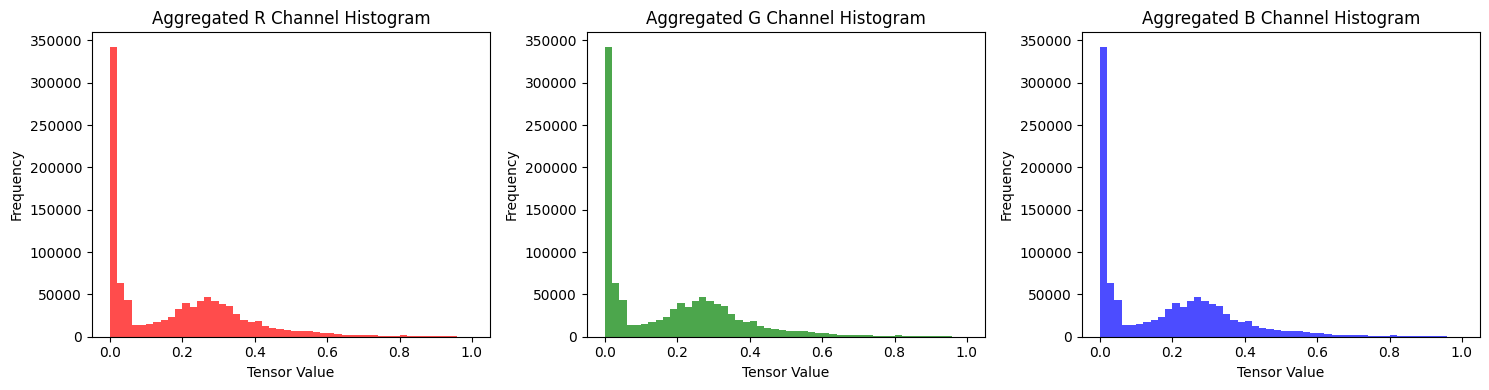

In [6]:

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),          # Convert image to tensor with values in [0,1]
])

# Set the path to the training dataset directory
train_data_dir = 'dataset/training'

# Create the dataset using ImageFolder. It will automatically use folder names as labels.
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)

print(f"Total images in training dataset: {len(train_dataset)}")
print(f"Classes: {train_dataset.classes}")

# Create a DataLoader to load images in batches
batch_size = 16
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Get one batch of images and labels
images, labels = next(iter(train_loader))
print(f"Batch image tensor shape: {images.shape}")  # Expected shape: (batch_size, 3, 256, 256)

# --- EDA on Tensors ---

# Compute per-channel mean and standard deviation for the batch.
# Flatten the spatial dimensions to compute statistics for each channel.
images_flat = images.view(images.size(0), images.size(1), -1)  # Shape: (batch_size, channels, 256*256)
batch_mean = images_flat.mean(dim=(0, 2))
batch_std = images_flat.std(dim=(0, 2))
print("Batch mean per channel:", batch_mean)
print("Batch standard deviation per channel:", batch_std)

# Plot aggregated histograms of tensor values for each channel across the batch.
colors = ['r', 'g', 'b']
plt.figure(figsize=(15, 4))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    # Aggregate tensor values for the entire batch for the given channel.
    channel_data = images[:, i, :, :].numpy().flatten()
    plt.hist(channel_data, bins=50, color=color, alpha=0.7)
    plt.title(f"Aggregated {color.upper()} Channel Histogram")
    plt.xlabel("Tensor Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()